In [2]:
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import torch
from actorcritic import CustomActorCriticPolicy

# VALUE

In [3]:
model = PPO.load('/Users/marcusbluestone/Desktop/Blackjack/test_results/final5/VALUES2,[1]/best_model.zip', policy=CustomActorCriticPolicy)
model.policy

CustomActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): CustomNetwork(
    (policy_net): Sequential(
      (0): Linear(in_features=20, out_features=1, bias=False)
      (1): ReLU()
    )
    (value_net): Sequential(
      (0): Linear(in_features=20, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=1, bias=True)
    )
  )
  (action_net): Linear(in_features=1, out_features=2, bias=True)
  (value_net): Linear(in_features=1, out_features=1, bias=True)
)

[[-6.217959   5.9971175]]
[ 4.8035026 -3.96925  ]


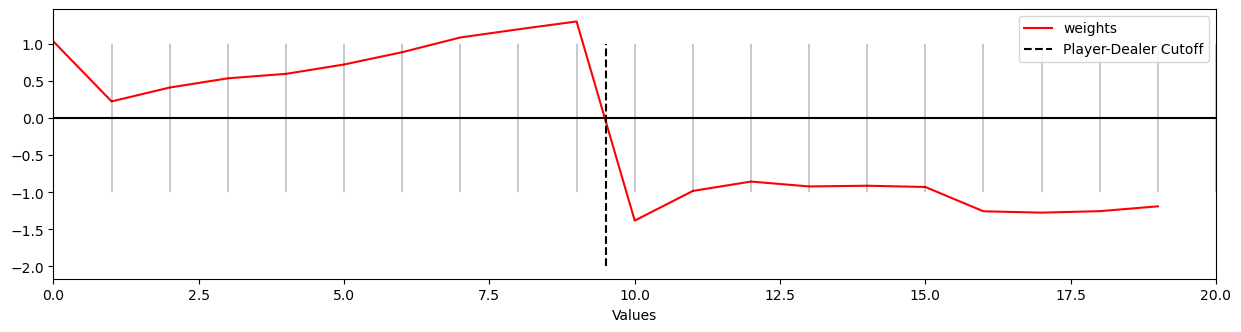

In [5]:
first_layer = list(model.policy.mlp_extractor.policy_net.parameters())[0].detach().numpy().T
second = list(model.policy.action_net.parameters())[0].detach().numpy().T
second_bias = list(model.policy.action_net.parameters())[1].detach().numpy().T

first_0 = first_layer
# first_1 = first_layer[:,1]
first_magnitude = np.linalg.norm(first_layer, axis = 1)

plt.figure(figsize=(15,3.5))
plt.xlim(0, 20)
plt.xlabel("Values")
plt.plot(first_0, label = 'weights', color = 'red')

plt.plot([9.5, 9.5], [-2, 1], label = "Player-Dealer Cutoff", color = 'black', linestyle='--')
plt.plot()
# plt.plot([45, 45], [0, 2], label = "Med-High cutoff")
color_list = ['black']
color_num = 0
for i in range(0, 152+1):
    if i % 5 == 0 and i != 0:
        color_num = (color_num + 1) % len(color_list)
    plt.plot([i, i], [-1, 1], linewidth = 0.3, color = color_list[color_num])

plt.axhline(y = 0, color = 'black')
plt.legend()
print(second)
print(second_bias)
#0, 1, 2, 3, 4
#5, 6, 7, 8, 9
#10, 

plt.legend(loc='upper right')

plt.savefig('values_weights.png')
#Bigger Values --> 

# TRUE (Linear)

[[ 5.158095 -3.935159]]
[-2.218246   3.7947304]


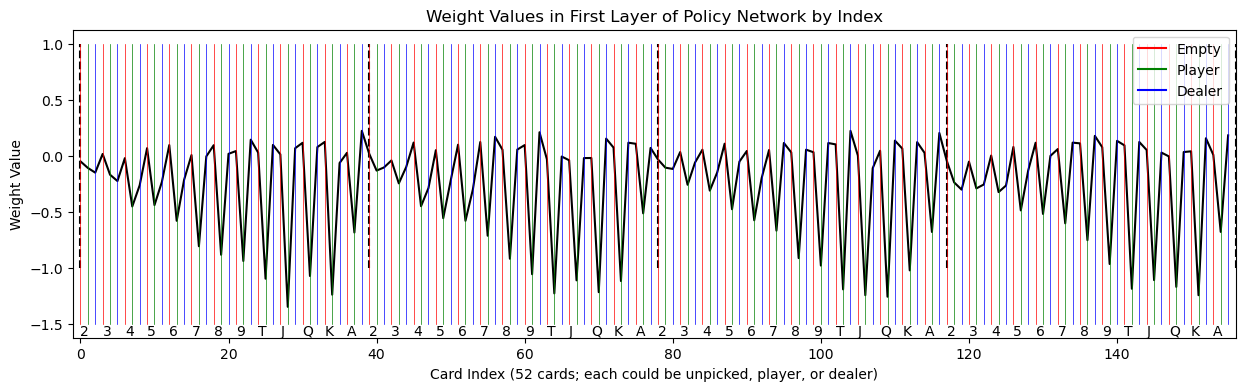

In [15]:
model = PPO.load('test_results/final3/TRUE,[1]/best_model.zip', policy=CustomActorCriticPolicy)
model.policy

first_layer = list(model.policy.mlp_extractor.policy_net.parameters())[0].detach().numpy().T
second = list(model.policy.action_net.parameters())[0].detach().numpy().T
second_bias = list(model.policy.action_net.parameters())[1].detach().numpy().T

first_0 = first_layer[:,0]

plt.figure(figsize=(15,4))
plt.xlim(-1, 156)
plt.plot(first_0, color = 'black')
# plt.plot(first_magnitude, label = 'first_mag', color = 'black')


# for i in range(0, 152+1, 3):
    # print(first_magnitude[i], first_magnitude[i+1], first_magnitude[i+2])
for i in range(0, 156+1, 39):
    plt.plot([i, i], [-1, 1], color = 'black', linestyle='--')

for i in range(0, 156+1):
    if i % 3 == 0: #empty
        plt.plot([i, i], [-1.5, 1], linewidth = 0.5, color = 'red')
        if i != 156:
            plt.text(i, -1.6, '23456789TJQKA'[(i//3) % 13])
    if i % 3 == 1: #player
        plt.plot([i, i], [-1.5, 1], linewidth = 0.5, color = 'green')
    if i % 3 == 2: #dealer
        plt.plot([i, i], [-1.5, 1], linewidth = 0.5, color = 'blue')
# plt.legend()
plt.title("Weight Values in First Layer of Policy Network by Index")
plt.xlabel("Card Index (52 cards; each could be unpicked, player, or dealer)")
plt.ylabel("Weight Value")

plt.plot([0], [0], color = 'red', label = 'Empty')
plt.plot([0], [0], color = 'green', label = 'Player')
plt.plot([0], [0], color = 'blue', label = 'Dealer')


plt.legend(loc='upper right')

print(second)
print(second_bias)
plt.savefig('Weight Values (TRUE LIN)')
#Symmetry Between Suits 
#Very Negative Weights --> Pushes answer below 0 --> RELU chops it and set to 0. Bias term encourages stay
# Negative Weights corresponds to player having higher cards 
# Many BJ policies have thresholding for specific groups of cards (low = -1, med = 0, high = 1) --> Here we see the advantage in tracking numbers individually
# Also, Ace seems to be weighted like a low/medium card not a high card

# TRUE (Simple)

In [ ]:
model = PPO.load('test_results/2024-11-25 10:38:37.519894/TRUE,[1]/best_model.zip', policy=CustomActorCriticPolicy)
model.policy

CustomActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): CustomNetwork(
    (policy_net): Sequential(
      (0): Linear(in_features=156, out_features=2, bias=False)
    )
    (value_net): Sequential(
      (0): Linear(in_features=156, out_features=1, bias=False)
    )
  )
  (action_net): Linear(in_features=2, out_features=2, bias=True)
  (value_net): Linear(in_features=1, out_features=1, bias=True)
)

model = PPO.load('test_results/2024-11-25 10:38:37.519894/TRUE,[1]/best_model.zip', policy=CustomActorCriticPolicy)


Mostly just keeping track of green, i.e which cards player uses

Assume lots of high cards used:
Effect of First Layer:
    first_0 is very negative

    first_1 is very positive

    but basically coppies of each other

    Output: [very negative; very positive]

Second Layer:
[[ 3.7320626 -3.8580713]
 [-3.751585   3.9367452]]

 Output: [very negative; very positive] --> STAY


 This means it is essentially learned a sum threshold strategy!!
1)   


[[ 3.7320626 -3.8580713]
 [-3.751585   3.9367452]]


Text(0, 0.5, 'Weight Value')

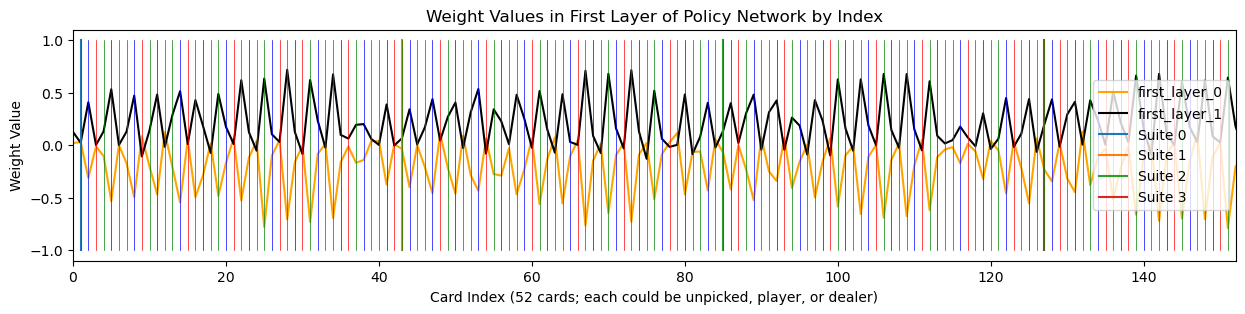

In [ ]:
#52 cards; 14 + 14 + 14 + 14
#x 3 for 3 options

first_layer = list(model.policy.mlp_extractor.policy_net.parameters())[0].detach().numpy().T
second = list(model.policy.action_net.parameters())[0].detach().numpy().T

first_0 = first_layer[:,0]
first_1 = first_layer[:,1]
first_magnitude = np.linalg.norm(first_layer, axis = 1)

plt.figure(figsize=(15,3))
plt.xlim(0, 152)
plt.plot(first_0, label = 'first_layer_0', color = 'orange')
plt.plot(first_1, label = 'first_layer_1', color = 'black')
# plt.plot(first_magnitude, label = 'first_mag', color = 'black')


# for i in range(0, 152+1, 3):
    # print(first_magnitude[i], first_magnitude[i+1], first_magnitude[i+2])
for i in range(1, 152, 42):
    plt.plot([i, i], [-1, 1], label = f"Suite {int((i-1)/42)}")

print(second)
for i in range(0, 152+1):
    if i % 3 == 0: #empty
        plt.plot([i, i], [-1, 1], linewidth = 0.5, color = 'red')
    if i % 3 == 1: #player
        plt.plot([i, i], [-1, 1], linewidth = 0.5, color = 'green')
    if i % 3 == 2: #dealer
        plt.plot([i, i], [-1, 1], linewidth = 0.5, color = 'blue')
plt.legend()
plt.title("Weight Values in First Layer of Policy Network by Index")
plt.xlabel("Card Index (52 cards; each could be unpicked, player, or dealer)")
plt.ylabel("Weight Value")

#0 is hit; 1 is stay
# input = [0 for _ in range(124)]
# input[0] = 1
# model.policy.mlp_extractor.policy_net.forward(torch.tensor(input, dtype=torch.float32))

# HIGH-LOW

In [5]:
model = PPO.load('/Users/marcusbluestone/Desktop/Blackjack/test_results/2024-11-25 14:54:47.618730/HIGH_LOW,[1]/best_model.zip')
model.policy

CustomActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): CustomNetwork(
    (policy_net): Sequential(
      (0): Linear(in_features=6, out_features=1, bias=True)
    )
    (value_net): Sequential(
      (0): Linear(in_features=6, out_features=1, bias=True)
    )
  )
  (action_net): Linear(in_features=1, out_features=2, bias=True)
  (value_net): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
first_layer = list(model.policy.mlp_extractor.policy_net.parameters())[0].detach().numpy().T
first_layer_bias = list(model.policy.mlp_extractor.policy_net.parameters())[1].detach().numpy().T

second_layer = list(model.policy.action_net.parameters())[0].detach().numpy().T
second_layer_bias = list(model.policy.action_net.parameters())[1].detach().numpy().T

print(first_layer)
print(first_layer_bias)
print()
print(second_layer)
print(second_layer_bias)


#Bigger values --> first term is much smaller --> less likley to hit 


[[ 0.48432627]
 [-0.89714944]
 [-1.0491208 ]
 [-1.7878087 ]
 [-0.25000975]
 [-0.17467695]]
[1.8742719]

[[ 2.9848843 -3.4680984]]
[-1.6958911  2.8661401]


# VALUES 2

In [37]:
model = PPO.load('test_results/final5/VALUES2,[1]/best_model.zip', policy=CustomActorCriticPolicy)
model.policy

CustomActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): CustomNetwork(
    (policy_net): Sequential(
      (0): Linear(in_features=20, out_features=1, bias=False)
      (1): ReLU()
    )
    (value_net): Sequential(
      (0): Linear(in_features=20, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=1, bias=True)
    )
  )
  (action_net): Linear(in_features=1, out_features=2, bias=True)
  (value_net): Linear(in_features=1, out_features=1, bias=True)
)

[[ 1.0321031 ]
 [ 0.22508974]
 [ 0.41210666]
 [ 0.5364477 ]
 [ 0.59648955]
 [ 0.723007  ]
 [ 0.8886221 ]
 [ 1.0871099 ]
 [ 1.1976255 ]
 [ 1.3027315 ]
 [-1.3814178 ]
 [-0.98167086]
 [-0.85538805]
 [-0.9210527 ]
 [-0.9117204 ]
 [-0.92870706]
 [-1.2562305 ]
 [-1.2742058 ]
 [-1.2544699 ]
 [-1.1893522 ]]
[[-6.217959   5.9971175]]
[ 4.8035026 -3.96925  ]


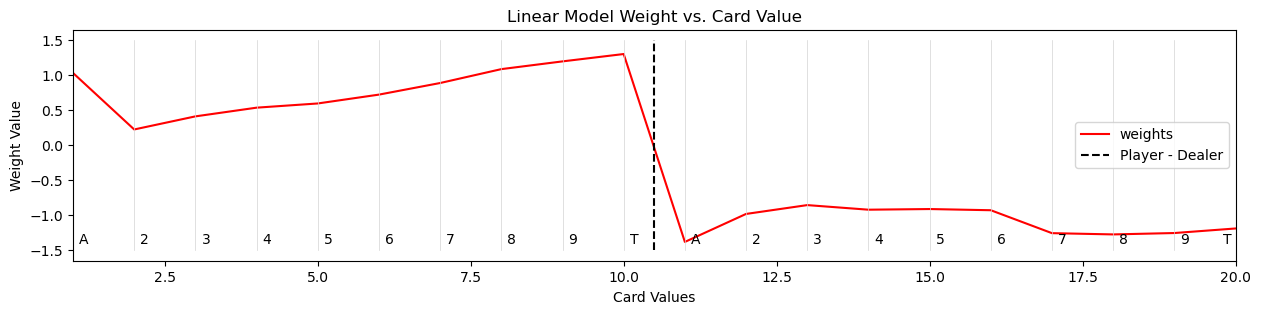

In [58]:
first_layer = list(model.policy.mlp_extractor.policy_net.parameters())[0].detach().numpy().T
# first_bias = list(model.policy.mlp_extractor.policy_net.parameters())[1].detach().numpy().T

print(first_layer)
second = list(model.policy.action_net.parameters())[0].detach().numpy().T
second_bias = list(model.policy.action_net.parameters())[1].detach().numpy().T

first_0 = first_layer[:,0]
# first_1 = first_layer[:,1]
first_magnitude = np.linalg.norm(first_layer, axis = 1)

plt.figure(figsize=(15,3))
plt.xlim(1, 20)
plt.xlabel("Card Values")
plt.ylabel("Weight Value")
plt.plot(range(1, 21), first_0, label = 'weights', color = 'red')
plt.plot([10.5, 10.5], [-1.5, 1.5], color = 'black', linestyle='--', label='Player - Dealer')
plt.legend()
plt.title("Linear Model Weight vs. Card Value")
for i in range(0, 20):
    plt.plot([i, i], [-1.5, 1.5], linewidth = 0.5, color = 'lightgrey')
    if i == 19:
        plt.text(i+0.8, -1.4, 'A23456789T'[i % 10])
    else:
        plt.text(i+1.1, -1.4, 'A23456789T'[i % 10])
#Bigger Values --> encourage u to STAY
#YOUR Ace is BAD; DEALER Ace is Good? 
# Dealer card has less impact than ur card
# Dealer curve is interesingly non-linear 
print(second)
print(second_bias)

In [4]:
model = PPO.load('test_results/final3/HIGH_LOW,[1]/best_model.zip')
print(model.policy)

CustomActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): CustomNetwork(
    (policy_net): Sequential(
      (0): Linear(in_features=6, out_features=1, bias=False)
      (1): ReLU()
    )
    (value_net): Sequential(
      (0): Linear(in_features=6, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
      (4): Linear(in_features=128, out_features=1, bias=True)
    )
  )
  (action_net): Linear(in_features=1, out_features=2, bias=True)
  (value_net): Linear(in_features=1, out_features=1, bias=True)
)
